In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
df = pd.read_csv('house_price_regression_dataset.csv')


In [3]:
df.head()

,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality,House_Price
0,1360,2,1,1981,0.599637,0,5,262382.8523
1,4272,3,3,2016,4.753014,1,6,985260.8545
2,3592,1,2,2016,3.634823,0,9,777977.3901
3,966,1,2,1977,2.730667,1,8,229698.9187
4,4926,2,1,1993,4.699073,0,8,1041740.859


In [5]:
df[df['House_Price']=='" "']

,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality,House_Price
358,3559,2,1,2003,3.217329,2,8,""" """
408,3767,5,3,1981,1.520335,2,4,""" """
686,3783,4,3,1963,4.626239,2,10,""" """


In [6]:
df.drop(index=358,inplace=True)

In [7]:
df.drop(index=408,inplace=True)

In [8]:
df.drop(index=686,inplace=True)

In [9]:
df[df['House_Price']=='" "']

,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality,House_Price


In [10]:
features = df.drop(columns='House_Price')

In [11]:
features.head()

,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality
0,1360,2,1,1981,0.599637,0,5
1,4272,3,3,2016,4.753014,1,6
2,3592,1,2,2016,3.634823,0,9
3,966,1,2,1977,2.730667,1,8
4,4926,2,1,1993,4.699073,0,8


In [12]:
features.info()

<class 'pandas.core.frame.DataFrame'>
Index: 997 entries, 0 to 999
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Square_Footage        997 non-null    int64  
 1   Num_Bedrooms          997 non-null    int64  
 2   Num_Bathrooms         997 non-null    int64  
 3   Year_Built            997 non-null    int64  
 4   Lot_Size              997 non-null    float64
 5   Garage_Size           997 non-null    int64  
 6   Neighborhood_Quality  997 non-null    int64  
dtypes: float64(1), int64(6)
memory usage: 62.3 KB


In [14]:
features.apply(convert)

,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality
0,1360,2,1,1981,0.5996,0,5
1,4272,3,3,2016,4.7530,1,6
2,3592,1,2,2016,3.6348,0,9
3,966,1,2,1977,2.7307,1,8
4,4926,2,1,1993,4.6991,0,8
...,...,...,...,...,...,...,...
995,3261,4,1,1978,2.1651,2,10
996,3179,1,2,1999,2.9771,1,10
997,2606,4,2,1962,4.0551,0,2
998,4723,5,2,1950,1.9309,0,7


In [16]:
X = features.to_numpy()

In [17]:
X

array([[1.36000000e+03, 2.00000000e+00, 1.00000000e+00, ...,
        5.99636640e-01, 0.00000000e+00, 5.00000000e+00],
       [4.27200000e+03, 3.00000000e+00, 3.00000000e+00, ...,
        4.75301385e+00, 1.00000000e+00, 6.00000000e+00],
       [3.59200000e+03, 1.00000000e+00, 2.00000000e+00, ...,
        3.63482272e+00, 0.00000000e+00, 9.00000000e+00],
       ...,
       [2.60600000e+03, 4.00000000e+00, 2.00000000e+00, ...,
        4.05506679e+00, 0.00000000e+00, 2.00000000e+00],
       [4.72300000e+03, 5.00000000e+00, 2.00000000e+00, ...,
        1.93092148e+00, 0.00000000e+00, 7.00000000e+00],
       [3.26800000e+03, 4.00000000e+00, 2.00000000e+00, ...,
        3.10879025e+00, 2.00000000e+00, 2.00000000e+00]])

In [13]:
def convert(X):
    return np.round(X,4)

In [22]:
convert(5.6685421457)

5.6685

In [18]:
X = np.round(X,4)

In [19]:
X.shape

(997, 7)

In [20]:
X_train = X[:780,]

In [21]:
X_train.shape

(780, 7)

In [22]:
X_test = X[780:,]

In [23]:
def convert2(X):
    return float(X)
    

In [24]:
df['House_Price'] = df['House_Price'].apply(convert2)

In [25]:
Y = df['House_Price'].to_numpy()

In [26]:
Y.shape

(997,)

In [27]:
Y_train,Y_test = Y[:780],Y[780:]

Linear Regressions , Normal equation , X^TXW = X^TY 

In [28]:
C = np.dot(X_train.T,X_train)

In [29]:
inv = np.linalg.pinv(C)

In [30]:
inv.shape

(7, 7)

In [31]:
comp = np.dot(X_train.T,Y_train)

In [32]:
comp.shape

(7,)

In [33]:
W = np.dot(inv,comp)

In [34]:
W

array([  199.13080762,  9831.90517369,  7630.94810855,   -14.12339854,
       13840.90230571,  4714.33719679,  -196.06385822])

In [35]:
W.shape

(7,)

In [36]:
pred1 = X_train[0]@W

In [37]:
pred1

277452.89004266064

In [45]:
def RMSE_p(Y_pred,Y_actual):
    s = 0
    for i in range(len(Y_pred)):
        s += (Y_pred[i] - Y_actual[i])**2
    mse = s/(2*len(Y_pred))
    rmse = mse**0.5
    return mse,rmse

In [53]:
def R2_s(Y_pred,Y_actual):
    y_mean = np.mean(Y_actual)
    actual =0 
    meaned = 0 
    for i in range(len(Y_actual)):
        actual += (Y_actual[i]- Y_pred[i])**2 
        meaned += (Y_actual[i] - y_mean)**2
    print(actual,meaned)
    r2 = 1-(actual/meaned)
    return r2
        

In [38]:
Y_predict_training = np.zeros(X_train.shape[0],dtype=float)

In [39]:
for i in range(len(X_train)):
    pred = np.dot(X_train[i],W)
    Y_predict_training[i] = pred 

In [40]:
Y_predict_training.shape

(780,)

In [46]:
RMSE_p(Y_predict_training,Y_train)

(259919036.2284961, 16122.004721141106)

In [59]:
R2_s(Y_predict_training,Y_train)

405473696516.4539 50893388191089.305


0.9920328806760905

In [60]:
residuals = Y_train - Y_predict_training

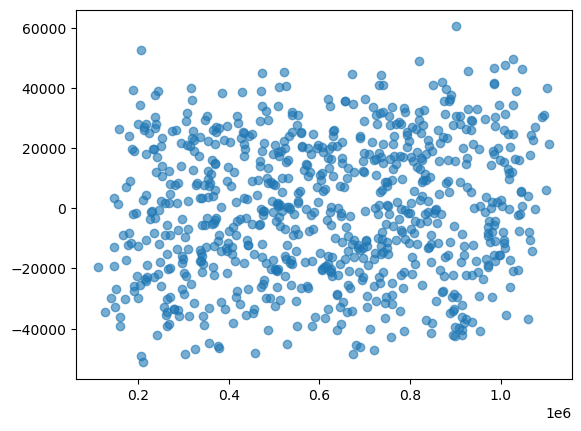

In [61]:
plt.scatter(Y_train,residuals,alpha=0.6)
plt.show()

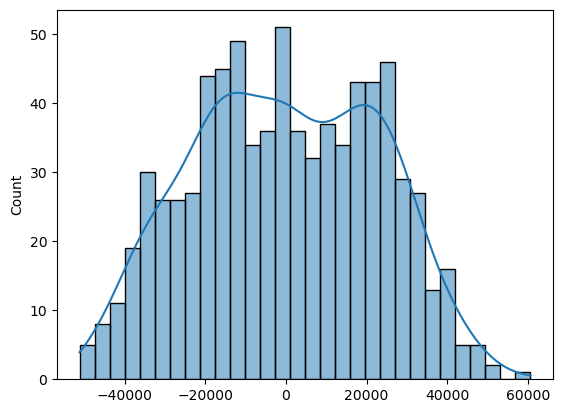

In [63]:
sns.histplot(residuals,bins=30,kde=True)
plt.show()

In [64]:
def linear_regression_fit(X1,Y1):
    c = np.dot(X1.T,X1)
    inv = np.linalg.pinv(c)
    comp = np.dot(X1,Y1)
    W = np.dot(inv,comp)
    return W 
    

In [65]:
def linear_regression_predict(X1,W):
    return np.dot(X1,W)
    

In [79]:
def predict_points(x1,w):
    Y_pred_test = np.zeros(x1.shape[0],dtype=float)
    for i in range(len(X_test)):
        pred = linear_regression_predict(x1[i],w)
        Y_pred_test[i] = pred
    return Y_pred_test

In [83]:
Y_pred_test2 = predict_points(X_test,W)

In [84]:
Y_test.shape

(217,)

In [87]:
RMSE_p(Y_pred_test2,Y_test)

(271753113.8563036, 16484.935967613084)

In [88]:
R2_s(Y_pred_test2,Y_test)

117940851413.63574 13181669283054.229


0.9910526619291492